# Assignment 2: Machine Learning (Norwegian Airlines Stock Prediction)

Group 9:
- Henry Tran (s905398)
- Markus Einan (s315297)
- Benjamin Haug Weel (s331365)
- Edvard Tollefsrud (s331390)

In [148]:
# Importing classes
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

# Reading the NAS csv file to the dataset
df = pd.read_csv("NAS.csv")

# Visualisation of the dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


# Data cleaning

In [149]:
# Finding null values in the dataset
df.isnull().sum()

Date          0
Open         35
High         35
Low          35
Close        35
Adj Close    35
Volume       35
dtype: int64

In [150]:
# We see that there is 35 null values in the dataset and we remove them
df.dropna(inplace=True)

# Checking again for null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [151]:
# Looking again at the dataset and seeing that it is now only 4218 elements,
# which correlates with that we removed 35 from the starting 4253 elements
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4248,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4249,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4250,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4251,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [152]:
#removes the unused columns
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
# Converting dataset['Date'] to date format
df['Date'] = pd.to_datetime(df['Date'])

In [153]:
# Creating new data fields
df['Year'] = df['Date'].dt.year
df['Month'] = month = df['Date'].dt.month
df['Day'] = day = df['Date'].dt.day
encodeDayName = pd.get_dummies(df['Date'].dt.day_name())
df = pd.concat([df, encodeDayName['Monday'], encodeDayName['Tuesday'], encodeDayName['Wednesday'], encodeDayName['Thursday'], encodeDayName['Friday']], axis=1)

In [154]:
# Setting index as date
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']
df = df.drop(['Date'], axis=1)

In [155]:
# Looking at the new clean dataset
df

,Close,Year,Month,Day,Monday,Tuesday,Wednesday,Thursday,Friday
Date,,,,,,,,,
2003-12-18,19.139799,2003,12,18,0,0,0,1,0
2003-12-19,18.454201,2003,12,19,0,0,0,0,1
2003-12-22,18.054300,2003,12,22,1,0,0,0,0
2003-12-23,17.425800,2003,12,23,0,1,0,0,0
2003-12-29,17.254400,2003,12,29,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2020-10-12,0.676800,2020,10,12,1,0,0,0,0
2020-10-13,0.600600,2020,10,13,0,1,0,0,0
2020-10-14,0.626000,2020,10,14,0,0,1,0,0


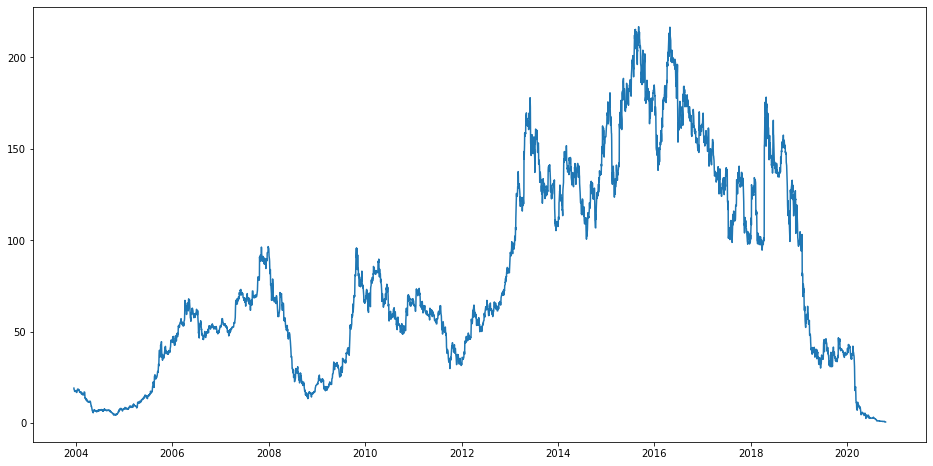

In [156]:
# Plotting the NAS history
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close price history')

# Linear regression

In [157]:
# Importing linear regression packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Training data
x = df.drop('Close', axis='columns')
y = df['Close']

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.1)
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((422, 8), (422,))

In [158]:
# Creating linear regression object
regObj = LinearRegression(normalize=True)
regObj.fit(x_train, y_train)

LinearRegression(normalize=True)

In [159]:
y_pred = regObj.predict(x_test)

In [160]:
# The coefficients
print('Coefficients: \n', regObj.coef_)
# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('The predction percentage score: %.2f' %r2_score(y_test, y_pred))

Coefficients: 
 [5.62568164e+00 4.19078053e-01 3.52981597e-02 1.71969780e+14
 1.71969780e+14 1.71969780e+14 1.71969780e+14 1.71969780e+14]
Mean squared error: 2487.30
The predction percentage score: 0.23


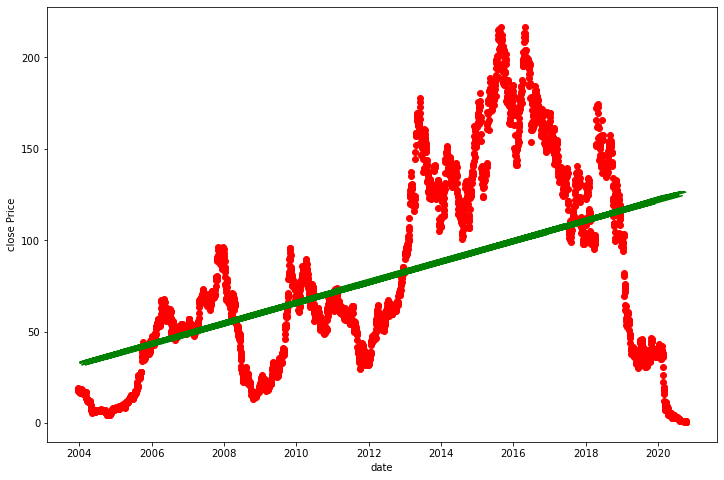

In [161]:
#Visual Represention of linear equation with Linear Regression
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(x_train.index, y_train, color = "red")
plt.plot(x_test.index,y_pred, color='green')
plt.xlabel('date')
plt.ylabel('close Price')
plt.show()

In [162]:
# Here we will predicte Norwegian Airlines Stock for dato 2020-11-02 Monday
print('predicte Norwegian Airlines Stock for dato 2020-11-02 Monday: %.2f' %regObj.predict([[2020,11,2,1,0,0,0,0]]))

predicte Norwegian Airlines Stock for dato 2020-11-02 Monday: 126.62
